Я выбрал атрибут, который мы будем называть Price Variation. Он отобразит разницу в стоимости атрибутом 'Open' и атрибутом 'Close'. Для удобства все изменения будут сохранены в файл (Up_Apple.csv).

In [13]:
import pandas as pd

data = pd.read_csv('Apple.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Price Variation'] = data['Close'] - data['Open']

print(data.to_string())

data.to_csv('Up_Apple.csv', index=False)

             Date        Open        High         Low       Close   Adj Close        Volume  Price Variation
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.101261  4.690336e+08         0.000000
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095978  1.758848e+08        -0.000558
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088934  1.057280e+08        -0.000558
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.091135  8.644160e+07         0.000000
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.093777  7.344960e+07         0.000000
5      1980-12-19    0.126116    0.126674    0.126116    0.126116    0.099500  4.863040e+07         0.000000
6      1980-12-22    0.132254    0.132813    0.132254    0.132254    0.104343  3.736320e+07         0.000000
7      1980-12-23    0.137835    0.138393    0.137835    0.137835    0.108746  4.695040e+07         0.000000
8      1980-12-24  

In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv('Up_Apple.csv')

if 'Date' in data.columns:
    dates = data['Date']  
    data = data.drop(columns=['Date'])  

duplicates = data.duplicated().sum()
print(f"Количество дублей в датасете: {duplicates}")
data = data.drop_duplicates()

missing_values = data.isnull().sum()
print(f"Пропущенные значения в каждом атрибуте:\n{missing_values.to_string()}")

data = data.fillna(data.mean())

missing_values_after = data.isnull().sum()
print(f"Пропущенные значения после обработки:\n{missing_values_after.to_string()}")

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print(f"Количество выбросов в каждом атрибуте:\n{outliers.sum().to_string()}")

data_cleaned = data[~outliers.any(axis=1)]

rows_removed = len(data) - len(data_cleaned)
print(f"Количество удалённых строк (выбросов): {rows_removed}")

if 'Date' in locals():
    data_cleaned['Date'] = dates

print("Первые строки очищенного датасета:")
print(data_cleaned.head())

data_cleaned.to_csv('New_Up_Apple.csv', index=False)

Количество дублей в датасете: 0
Пропущенные значения в каждом атрибуте:
Open               1
High               1
Low                1
Close              1
Adj Close          1
Volume             1
Price Variation    1
Пропущенные значения после обработки:
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Price Variation    0
Количество выбросов в каждом атрибуте:
Open               1430
High               1438
Low                1453
Close              1429
Adj Close          1548
Volume              716
Price Variation    3106
Количество удалённых строк (выбросов): 3516
Первые строки очищенного датасета:
       Open      High       Low     Close  Adj Close       Volume  \
0  0.128348  0.128906  0.128348  0.128348   0.101261  469033600.0   
1  0.122210  0.122210  0.121652  0.121652   0.095978  175884800.0   
2  0.113281  0.113281  0.112723  0.112723   0.088934  105728000.0   
3  0.115513  0.116071  0.115513  0

В этом разделе мы занимаемся очисткой нашего датасета, устраняя пропуски, выбросы и дубликаты.
Для работы с дубликатами мы сначала их выявляем, а затем удаляем.
Чтобы справиться с пропусками, мы определяем их и заменяем средним значением, после чего проводим повторную проверку данных.
В ходе обработки были найдены пропуски в каждом атрибуте. Все выбросы и дубликаты были удалены.
В выводе выше представлена вся информация для проверки.
Также для удобства создан файл, в который была записана вся обновленная информация (New_Up_Apple.csv).

В этом разделе мы создаем графики зависимостей и анализируем их кластеры. Также мы к каждому графику выделили кластер с помощью метода KMeans.

Первый график демонстрирует зависимость цены закрытия от цены открытия, и мы можем наблюдать, что эта зависимость имеет практически линейный характер.

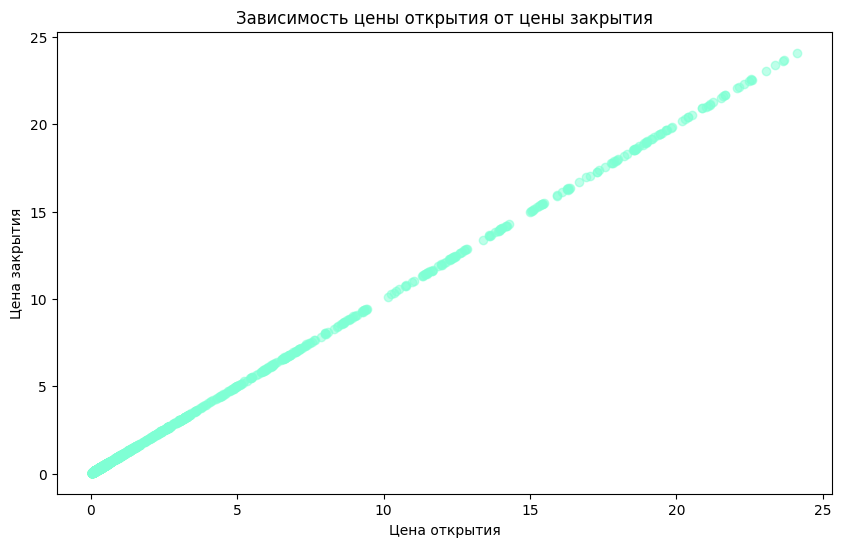

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('New_Up_Apple.csv')

plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Open'], data_cleaned['Close'], alpha=0.5, c='aquamarine')
plt.title('Зависимость цены открытия от цены закрытия')
plt.xlabel('Цена открытия')
plt.ylabel('Цена закрытия')
plt.show()

Кластер подтверждает, что при максимальных объемах торгов цена акций компании Apple будет минимальной.

Второй график иллюстрирует зависимость цены закрытия от объемов торгов. В нашем случае наблюдается, что при низких объемах торгов цена закрытия чаще всего увеличивается.

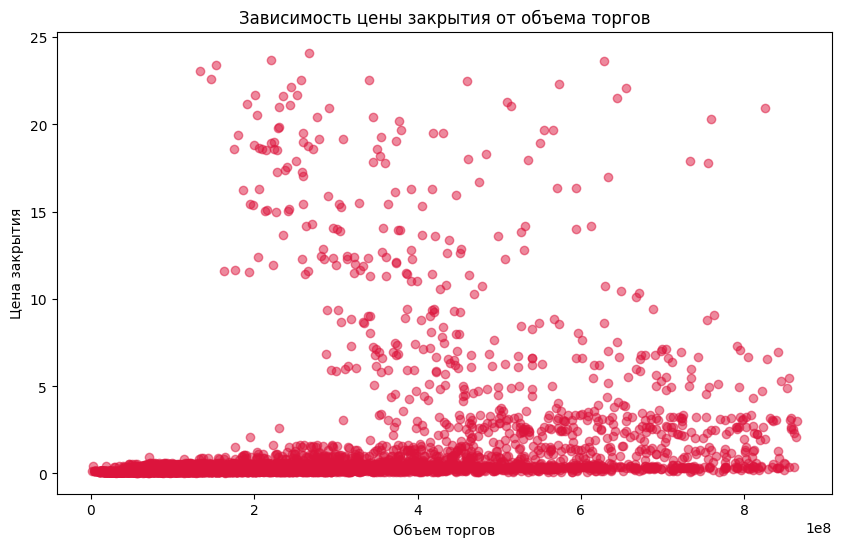

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('New_Up_Apple.csv')

plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Volume'], data_cleaned['Close'], alpha=0.5, c='crimson')
plt.title('Зависимость цены закрытия от объема торгов')
plt.xlabel('Объем торгов')
plt.ylabel('Цена закрытия')
plt.show()

Кластер демонстрирует максимальную цену акций при минимальных объемах торгов.

Третий график показывает, как разница между ценой открытия и ценой закрытия коррелирует с объемами торгов. В этом контексте можно с уверенностью сказать, что при низких объемах торгов отклонение этой разницы от нуля практически не заметно.

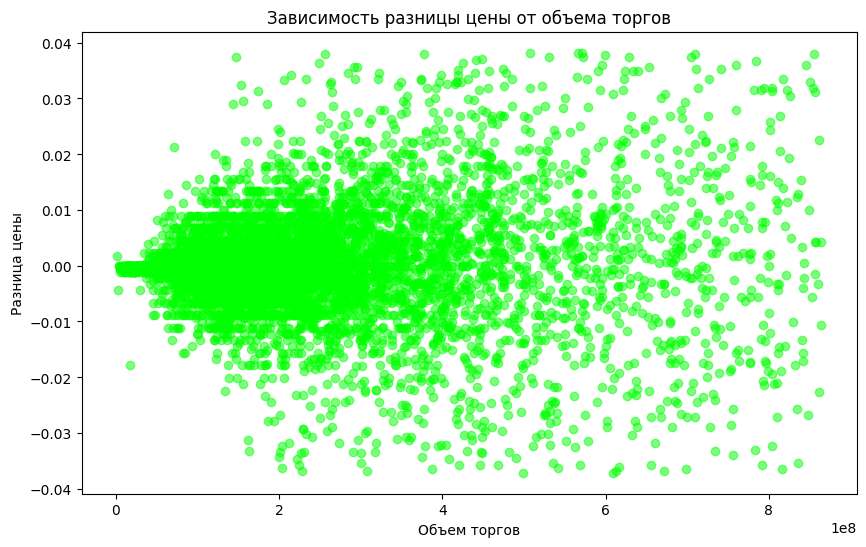

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('New_Up_Apple.csv')

plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Volume'], data_cleaned['Price Variation'], alpha=0.5, c='lime')
plt.title('Зависимость разницы цены от объема торгов')
plt.xlabel('Объем торгов')
plt.ylabel('Разница цены')
plt.show()

Кластер является промежуточным и показывает среднюю цену акций при средних объемах торгов.

Применение метода KMeans к нашему датасету.

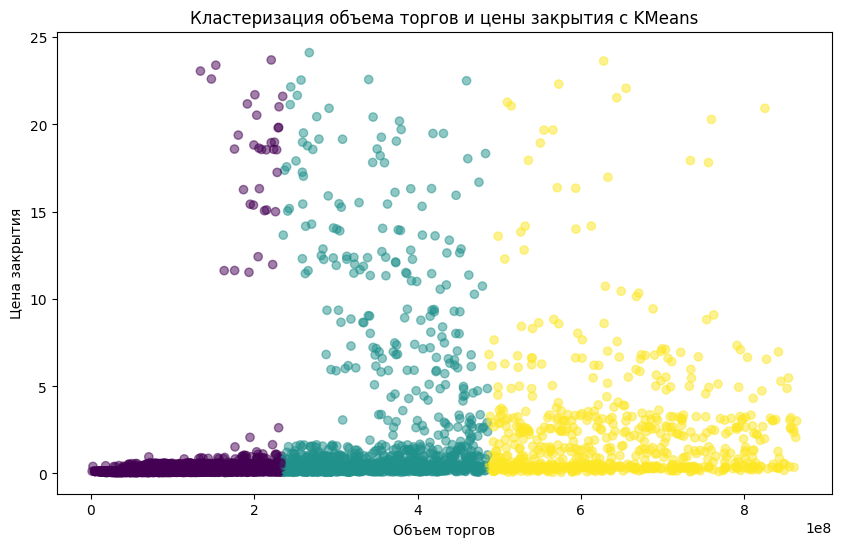

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('New_Up_Apple.csv')

features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data_cleaned[features].values

kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Volume'], data_cleaned['Close'], c=data_cleaned['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Кластеризация объема торгов и цены закрытия с KMeans')
plt.xlabel('Объем торгов')
plt.ylabel('Цена закрытия')
plt.show()

Вывод: В результате проведенной работы мы смогли освоить основные принципы обработки и кластеризации данных. В данном случае мы смогли анализировать изменения цены акций компании Apple.